DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. It is able to find arbitrary shaped clusters and clusters with noise (i.e. outliers).

Let's load some [scikit-learn](https://scikit-learn.org/) and [Matplotlib](https://matplotlib.org) libararies.


In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

We will create a dataset with 3 clusters with 0.5 standard deviation for each cluster. Number of samples is 400 and we also choose three points as centroids (center of clusters). You can adjust these parameters however you like using the `make_blobs` function.

You can find more about the `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) and about `make_blobs` [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

In [2]:
centers = [[0.5, 2], [-1, -1], [1.5, -1]] #Create dataset
X, y = make_blobs(n_samples=400, centers=centers,
                  cluster_std=0.5, random_state=0) #Normalize the values
X = StandardScaler().fit_transform(X)

Let's take a look at our data points, assiging each "dataset" its own color (for our convenience).



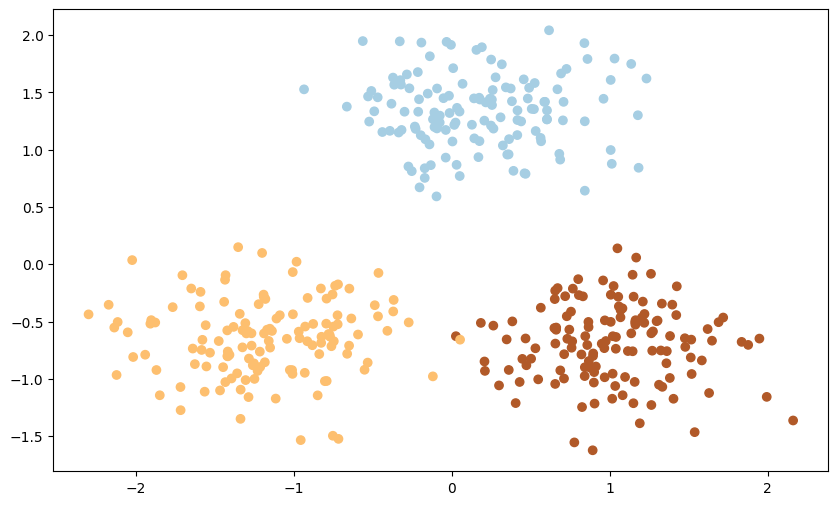

In [3]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')

We can now instanciace a [scikit-learn DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) object and configure it with an epsilon of 0.4 and a minimum number of samples to 40. (You can adjust this and see how the algorithm performs.)

In [4]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.4, min_samples=20)
db.fit(X)

DBSCAN(eps=0.4, min_samples=20)

Let's use our `db` object to cluster the whole dataset `X`.


Text(0.5, 1.0, 'Clusters determined by DBSCAN')

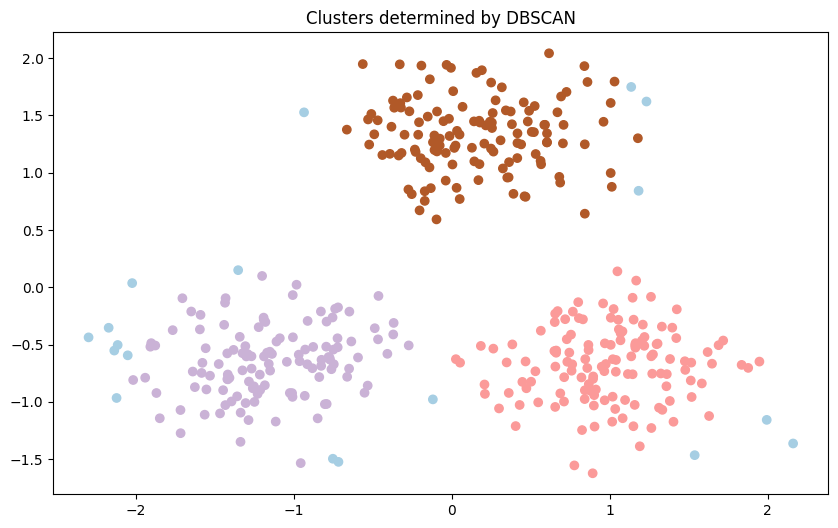

In [5]:
y_pred = db.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("Clusters determined by DBSCAN")

Our DBSCAN model was able to detect the outliers (marked with blue).

We can access the labels of data points using labels_ attribute. Noise (or outliers) are given -1 label. Let’s check the number of outliers:

In [6]:
db.labels_[db.labels_ == -1].size

18

The clusters in this sample dataset do not have actually have arbitrary shapes. But DBSCAN performed really good at detecting outliers which would not be easy with partition-based (e.g. k-means) or hierarchical (e.g. agglomerative) clustering techniques.

If you also apply DBSCAN to a dataset with arbitrary shaped clusters, you will see it shines even more!